<a href="https://colab.research.google.com/github/sunnyday2/flight_on_time/blob/desarrollo/anna_flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data set Kagge de Anna

## Cargar entorno de Kaggle

In [3]:
# -*- coding: utf-8 -*-
"""Annaflight.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1AG6CifrH5K6hr-INsiNdKLSu3tYsoVTI
"""

import kagglehub

# Download latest version
path = kagglehub.dataset_download("threnjen/2019-airline-delays-and-cancellations")

print("Path to dataset files:", path)

import os

os.listdir(path)


Using Colab cache for faster access to the '2019-airline-delays-and-cancellations' dataset.
Path to dataset files: /kaggle/input/2019-airline-delays-and-cancellations


['train_sets_documentation.txt',
 'raw_data',
 'raw_data_documentation.txt',
 'full_data_flightdelay.csv',
 'train.csv',
 'test.csv']

## Obtener la información sobre el data set

In [17]:
#Tamaño real del csv

import pandas as pd

# Definir la ruta al CSV
csv_path = path+"/"+"full_data_flightdelay.csv"  # o la ruta completa si está en otra carpeta

# Cargar solo las columnas necesarias
df = pd.read_csv(
    csv_path,
    usecols=["CARRIER_NAME", "DEP_DEL15", "DEP_TIME_BLK", "DISTANCE_GROUP", "DAY_OF_WEEK"]
)

# 'DEP_DEL15' ya es un indicador binario (1 si retraso >= 15 min, 0 si no)
df["delayed"] = df["DEP_DEL15"]

# Mostrar primeras filas para confirmar
df.head()

,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_NAME,delayed
0,7,0,0800-0859,2,Southwest Airlines Co.,0
1,7,0,0700-0759,7,Delta Air Lines Inc.,0
2,7,0,0600-0659,7,Delta Air Lines Inc.,0
3,7,0,0600-0659,9,Delta Air Lines Inc.,0
4,7,0,0001-0559,7,Spirit Air Lines,0


## Cargo muestra dataframe de 100k

In [18]:
import pandas as pd

csv_path = path+"/"+"full_data_flightdelay.csv"

# Leer solo el encabezado del archivo CSV para obtener los nombres de las columnas
df_columns = pd.read_csv(csv_path, nrows=100_000)

# Mostrar los nombres de las columnas
print("Columnas disponibles en el archivo CSV:")
for col in df_columns.columns:
    print(col)

Columnas disponibles en el archivo CSV:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND


In [19]:
df.shape


(6489062, 6)

## Explorar las columnas

In [20]:
df.columns

df["delayed"] = df["DEP_DEL15"]
df["hour"] = df["DEP_TIME_BLK"].str.slice(0, 2).astype(int)
print("Delay rate:", df["delayed"].mean())

#Prueba binaria

df["delayed"].unique()

#Retraso por hora del día, agrupo hour y delayed y gráfica. Quiero saber si hay diferencias de probabilidad y si tienen realismo.

hour_delay = (
df.groupby("hour")["delayed"]   #la media del binario por grupo se interpreta como probabilidad.
.mean()
.sort_index()
)
print(hour_delay)


Delay rate: 0.18914413207949007
hour
0     0.079075
6     0.069112
7     0.093307
8     0.110800
9     0.133467
10    0.152465
11    0.164220
12    0.180571
13    0.195756
14    0.218463
15    0.224954
16    0.243204
17    0.254467
18    0.272079
19    0.280776
20    0.268357
21    0.275335
22    0.240937
23    0.212401
Name: delayed, dtype: float64


## Graficar probabilidad de retraso

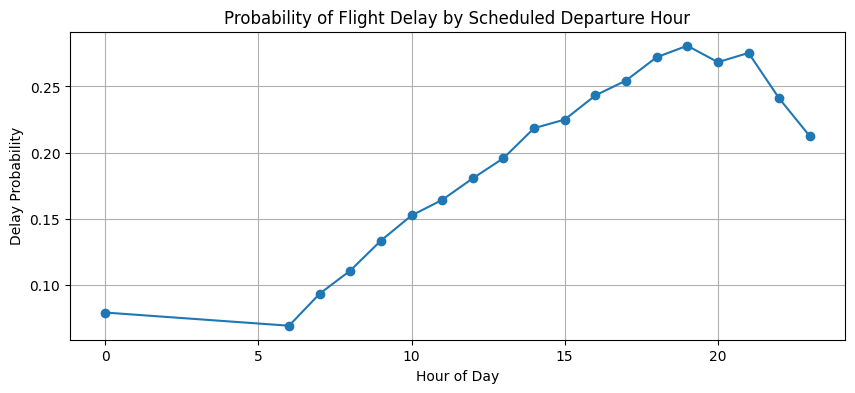

In [21]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10,4))
hour_delay.plot(kind="line", marker="o")
plt.title("Probability of Flight Delay by Scheduled Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delay Probability")
plt.grid(True)
plt.show()


## Retrasos por distancia y dia de la semana

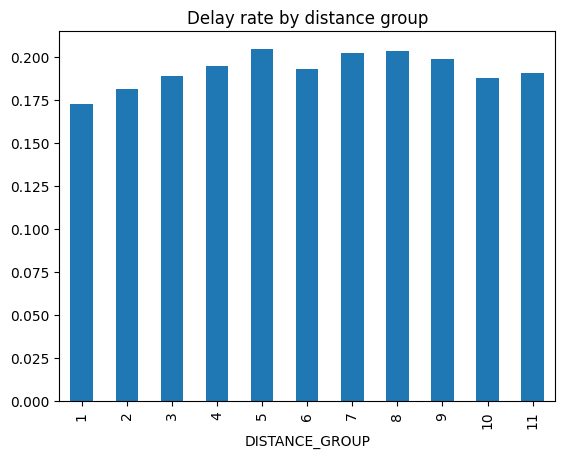

In [22]:
#Retraso x distancia (rango de millas) y gráfica

delay_by_dist = (
    df.groupby("DISTANCE_GROUP")["delayed"]
      .mean()
)

delay_by_dist


delay_by_dist.plot(kind="bar", title="Delay rate by distance group")

#Creo día de la semana

delay_by_day = (
    df.groupby("DAY_OF_WEEK")["DEP_DEL15"]
      .mean()
)


## Graficar por dia

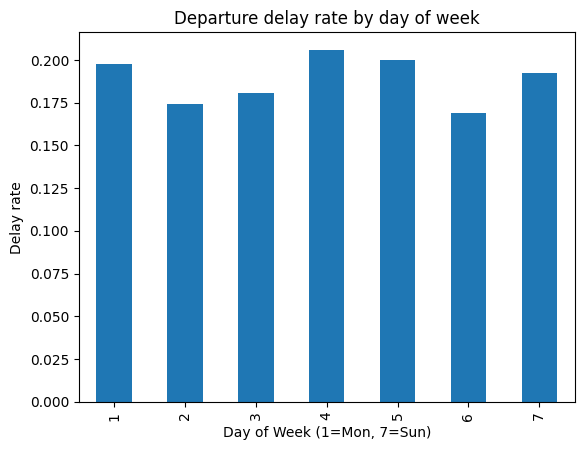

In [23]:
import matplotlib.pyplot as plt

plt.figure()
delay_by_day.plot(kind="bar")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Delay rate")
plt.title("Departure delay rate by day of week")
plt.show()




Graficar top 10 aerolineas

In [28]:
#top 10 aerolíneas

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path+"/"+"full_data_flightdelay.csv")
df["delayed"] = df["DEP_DEL15"] # Recrear la columna 'delayed'
df["hour"] = df["DEP_TIME_BLK"].str.slice(0, 2).astype(int) # Recrear la columna 'hour'
df.head()

df["delayed"].value_counts(normalize=True) #Variable objetiva binaria prueba

hour_delay = (
    df.groupby("hour")["delayed"]
    .mean()
)

In [27]:
hour_delay.std()

# Este criterio mide cuánto cambia la probabilidad de retraso a lo largo del día;
# si la variación es alta, significa que la hora del vuelo influye de forma real
# en los retrasos, y el ratio entre datasets nos permite comparar cuál captura
# mejor ese patrón temporal sin necesidad de entrenar ni optimizar modelos.

# Al medir la variación de la probabilidad de retraso según la hora, verificamos
# que la hora del vuelo tiene impacto real, y usando el ratio podemos decidir
# qué dataset conserva mejor esa señal predictiva sin incurrir en mayor coste
# computacional.

0.07002295525062882